<a href="https://colab.research.google.com/github/SelenaNahra/MachineLearning/blob/main/HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Libraries and Pre-defined Functions


```
# This is formatted as code
```



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/diabetes.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

def split_data (X,Y):
    #split data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

    return X_train, X_test, Y_train, Y_test

def scale_data(X_train, X_test):
    #scale between 1 and 0
    sc_X = StandardScaler()
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)

    return X_train, X_test

def logistic_regression(X_train,Y_train):
    classifier = LogisticRegression(random_state=0)
    classifier.fit(X_train, Y_train)

    return classifier

def gaussian_naive_bayes(X_train, Y_train, X_test):
    classifier = GaussianNB()
    classifier.fit(X_train, Y_train)
    Y_pred = classifier.predict(X_test)

    return Y_pred

def evaluate_model(classifier, X_test, Y_test):
    # make predictions
    Y_pred = classifier.predict(X_test)

    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)

    return accuracy, precision, recall, f1

def evaluate_model_GNB(Y_test, Y_pred):
    accuracy = accuracy_score(Y_test, Y_pred)
    precision = precision_score(Y_test, Y_pred)
    recall = recall_score(Y_test, Y_pred)
    f1 = f1_score(Y_test, Y_pred)
    return accuracy, precision, recall, f1

def confusion_matrix_plot(Y_test, Y_pred):
    # calculate confusion matrix
    cnf_matrix = confusion_matrix(Y_test, Y_pred)

    # create heatmap
    plt.figure()
    class_names = [0, 1]
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Problem 1

Accuracy: 0.8246753246753247
Precision: 0.7631578947368421
Recall: 0.6170212765957447
F1 Score: 0.6823529411764706


<Figure size 640x480 with 0 Axes>

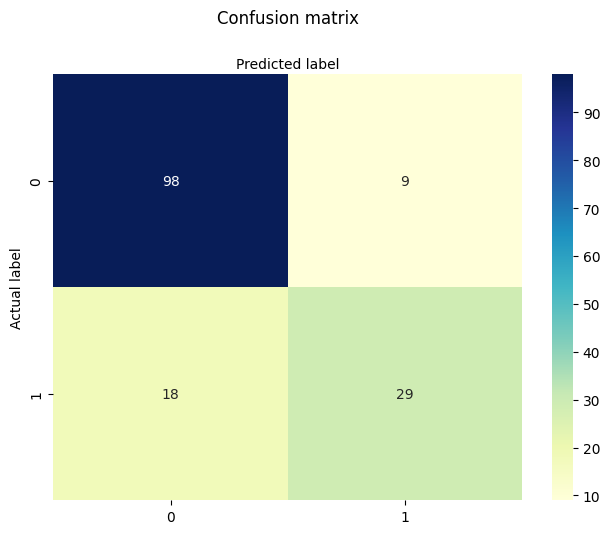

In [ ]:
X = dataset.iloc[:, [0,1,2,3,4,5,6,7]].values
Y = dataset.iloc[:, 8].values
#X[0:10]


X_train, X_test, Y_train, Y_test = split_data(X, Y)
X_train, X_test = scale_data(X_train, X_test)
classifier = logistic_regression(X_train, Y_train)
accuracy, precision, recall, f1 = evaluate_model(classifier, X_test, Y_test)

Y_pred = classifier.predict(X_test)
Y_pred[0:9]

print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", f1_score(Y_test, Y_pred))

confusion_matrix_plot(Y_test, Y_pred)



Problem 2


<ipython-input-45-25aba1b9110c>:5: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  dataset.iloc[:, 1] = dataset.iloc[:, 1].replace({'M': 1, 'B': 0})


Accuracy: 0.9649122807017544
Precision: 0.9574468085106383
Recall: 0.9574468085106383
F1 Score: 0.9574468085106385


<Figure size 640x480 with 0 Axes>

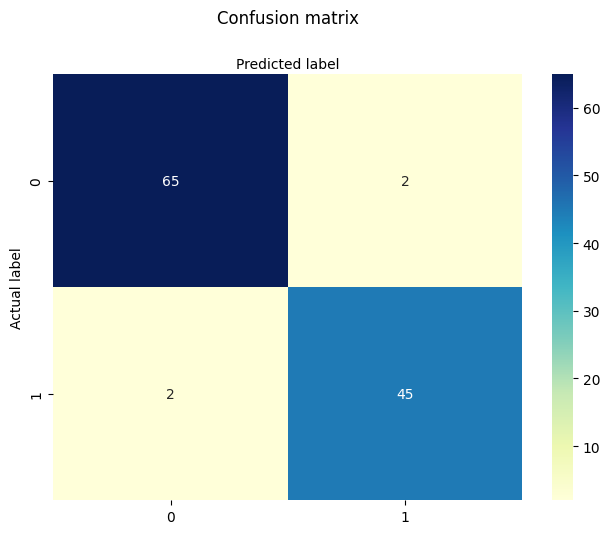

In [ ]:
file_path = '/content/drive/My Drive/cancer.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))

# replace 'M' with 1 and 'B' with 0
dataset.iloc[:, 1] = dataset.iloc[:, 1].replace({'M': 1, 'B': 0})
# save  modified data to the CSV file
dataset.to_csv('cancer.csv', index=False)

X1 = dataset.iloc[:, [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17.18,19,20,21,22,23,24,25,26,27,28,29,30,31]].values
Y1 = dataset.iloc[:, 1].values
#X[0:10]

X1_train, X1_test, Y1_train, Y1_test = split_data(X1, Y1)
X1_train, X1_test = scale_data(X1_train, X1_test)
classifier = logistic_regression(X1_train, Y1_train)
accuracy, precision, recall, f1 = evaluate_model(classifier, X1_test, Y1_test)

Y1_pred = classifier.predict(X1_test)
Y1_pred[0:9]

print("Accuracy:",metrics.accuracy_score(Y1_test, Y1_pred))
print("Precision:",metrics.precision_score(Y1_test, Y1_pred))
print("Recall:",metrics.recall_score(Y1_test, Y1_pred))
print("F1 Score:", f1_score(Y1_test, Y1_pred))

confusion_matrix_plot(Y1_test, Y1_pred)


Problem 2b


In [ ]:
# Create a scaler object
sc = StandardScaler()

# Fit the scaler to the training data and transform
X1_train_std = sc.fit_transform(X1_train)

# Apply the scaler to the test data
X1_test_std = sc.transform(X1_test)

C = [10, 1, .1, .001]

for c in C:
    clf = LogisticRegression(penalty='l1', C=c, solver='liblinear')
    clf.fit(X1_train, Y1_train)
    print('C:', c)
    print('Training accuracy:', clf.score(X1_train_std, Y1_train))
    print('Test accuracy:', clf.score(X1_test_std, Y1_test))
    print('')

C: 10
Training accuracy: 0.989010989010989
Test accuracy: 0.956140350877193

C: 1
Training accuracy: 0.9912087912087912
Test accuracy: 0.956140350877193

C: 0.1
Training accuracy: 0.9758241758241758
Test accuracy: 0.9736842105263158

C: 0.001
Training accuracy: 0.6373626373626373
Test accuracy: 0.5877192982456141



Problem 3

Accuracy: 0.7922077922077922
Precision: 0.6744186046511628
Recall: 0.6170212765957447
F1 Score: 0.6444444444444444


<Figure size 640x480 with 0 Axes>

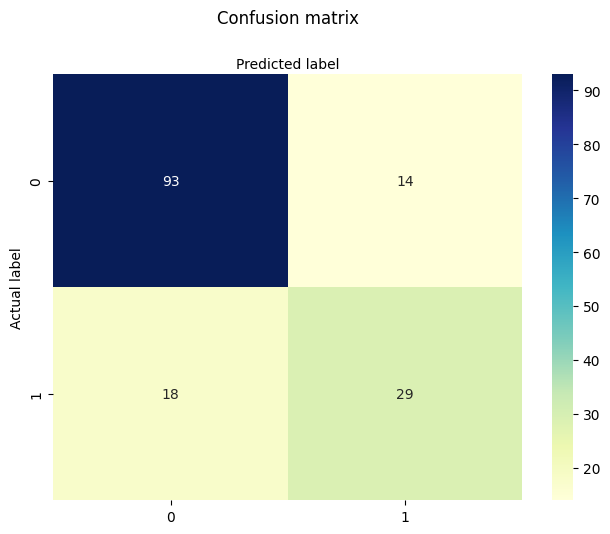

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = split_data(X, Y)
X1_train, X1_test = scale_data(X1_train, X1_test)
Y2_pred = gaussian_naive_bayes(X1_train, Y1_train, X1_test)
accuracy, precision, recall, f1 = evaluate_model_GNB( Y1_test, Y2_pred)

print("Accuracy:",metrics.accuracy_score(Y1_test, Y2_pred))
print("Precision:",metrics.precision_score(Y1_test, Y2_pred))
print("Recall:",metrics.recall_score(Y1_test, Y2_pred))
print("F1 Score:", f1_score(Y1_test, Y2_pred))

confusion_matrix_plot(Y1_test, Y2_pred)

Problem 4

Best K: 4
Accuracy: 0.9649122807017544
Precision: 0.9387755102040817
Recall: 0.9787234042553191
F1 Score: 0.9583333333333333


<Figure size 640x480 with 0 Axes>

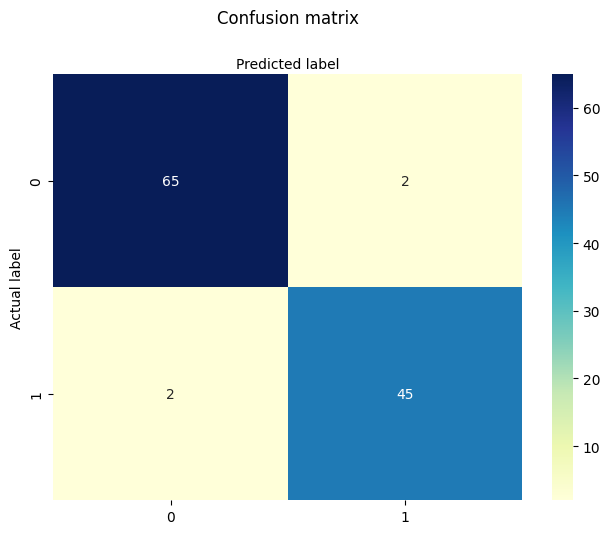

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = split_data(X1, Y1)
X1_train, X1_test = scale_data(X1_train, X1_test)

from sklearn.decomposition import PCA

K_values = range(1, 20)

# empty lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in K_values:
    # PCA with K components
    pca = PCA(n_components=K)
    X1_train_pca = pca.fit_transform(X1_train)
    X1_test_pca = pca.transform(X1_test)

    classifier = logistic_regression(X1_train_pca, Y1_train)

    # predictions on the test data
    Y1_pred = classifier.predict(X1_test_pca)

    # classification metrics
    accuracy = metrics.accuracy_score(Y1_test, Y1_pred)
    precision = metrics.precision_score(Y1_test, Y1_pred)
    recall = metrics.recall_score(Y1_test, Y1_pred)
    f1 = metrics.f1_score(Y1_test, Y1_pred)

    # append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

best_K = K_values[accuracy_list.index(max(accuracy_list))]

print(f"Best K: {best_K}")
print("Accuracy:", max(accuracy_list))
print("Precision:", precision_list[K_values.index(best_K)])
print("Recall:", recall_list[K_values.index(best_K)])
print("F1 Score:", f1_score_list[K_values.index(best_K)])

confusion_matrix_plot(Y1_test, Y1_pred)

Problem 5

Best K: 5
Accuracy: 0.9298245614035088
Precision: 0.9333333333333333
Recall: 0.8936170212765957
F1 Score: 0.9130434782608695


<Figure size 640x480 with 0 Axes>

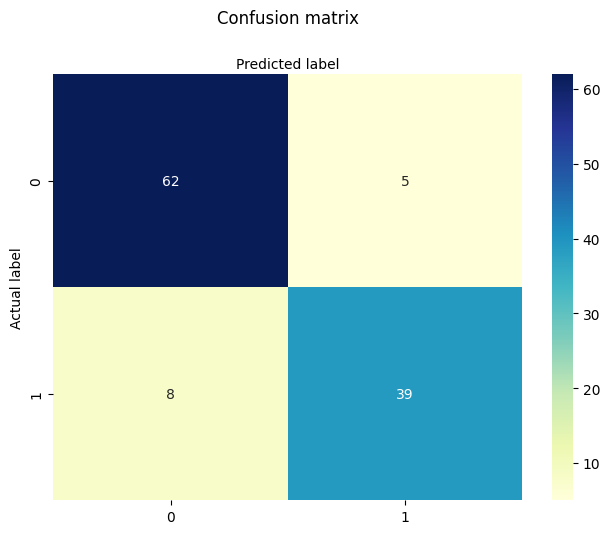

In [ ]:
X1_train, X1_test, Y1_train, Y1_test = split_data(X1, Y1)
X1_train, X1_test = scale_data(X1_train, X1_test)

from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB

K_values = range(1, 20)

# empty lists to store metrics
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

for K in K_values:
    # PCA with K components to the training and test set
    pca = PCA(n_components=K)
    X1_train_pca = pca.fit_transform(X1_train)
    X1_test_pca = pca.transform(X1_test)


    classifier = GaussianNB()
    classifier.fit(X1_train_pca, Y1_train)

    # predictions on the test data
    Y2_pred = classifier.predict(X1_test_pca)

    # classification metrics
    accuracy = metrics.accuracy_score(Y1_test, Y2_pred)
    precision = metrics.precision_score(Y1_test, Y2_pred)
    recall = metrics.recall_score(Y1_test, Y2_pred)
    f1 = metrics.f1_score(Y1_test, Y2_pred)

    # append metrics to lists
    accuracy_list.append(accuracy)
    precision_list.append(precision)
    recall_list.append(recall)
    f1_score_list.append(f1)

best_K = K_values[accuracy_list.index(max(accuracy_list))]

print(f"Best K: {best_K}")
print("Accuracy:", max(accuracy_list))
print("Precision:", precision_list[K_values.index(best_K)])
print("Recall:", recall_list[K_values.index(best_K)])
print("F1 Score:", f1_score_list[K_values.index(best_K)])

confusion_matrix_plot(Y1_test, Y2_pred)